In [2]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline

In [5]:
dblp_dataset_path = "./evaloff3/data/dblp_full.json"

In [6]:
with open(dblp_dataset_path) as f:
    dblp_dataset = json.load(f)
    
len(dblp_dataset)

22726

In [7]:
fields = set()

for reference in dblp_dataset:
    for key in reference.keys():
        fields.add(key)
        
fields

{'abstract',
 'authors',
 'citations',
 'fos',
 'id',
 'references',
 'title',
 'venue',
 'year'}

In [8]:
fields_count = {}
for field in fields:
    fields_count[field] = 0
    
for reference in dblp_dataset:
    for field in  fields:
        if reference[field]:
            fields_count[field] += 1
            
fields_count

{'title': 22726,
 'citations': 9675,
 'year': 22726,
 'authors': 22726,
 'references': 21561,
 'fos': 22726,
 'abstract': 22726,
 'id': 22726,
 'venue': 22726}

In [28]:
for ref in dblp_dataset:
    ref['title_word_count'] = len(ref['title'].split())
    ref['abstract_word_count'] = len(ref['abstract'].split())
    ref['author_count'] = len(ref['authors'])
    ref['year'] = int(ref['year'])
    ref['citation_count'] = len(ref['citations'])
    ref['reference_count'] = len(ref['references'])
    ref['link_count'] = len(ref['citations']) + len(ref['references'])
    ref['fos_count'] = len(ref['fos'])
    
dblp_df = pd.DataFrame(dblp_dataset)

In [29]:
dblp_df.describe()

,year,title_word_count,abstract_word_count,author_count,citation_count,reference_count,link_count,fos_count
count,22726.000000,22726.000000,22726.000000,22726.000000,22726.000000,22726.000000,22726.000000,22726.000000
mean,2017.425504,9.949837,169.102658,4.179354,3.529482,3.529482,7.058963,10.854704
std,2.320420,3.116631,53.443435,2.419984,33.463818,4.046548,33.866016,1.489711
min,1987.000000,1.000000,15.000000,1.000000,0.000000,0.000000,1.000000,4.000000
25%,2017.000000,8.000000,133.000000,3.000000,0.000000,1.000000,2.000000,10.000000
50%,2018.000000,10.000000,165.000000,4.000000,0.000000,3.000000,4.000000,11.000000
75%,2019.000000,12.000000,201.000000,5.000000,2.000000,5.000000,7.000000,12.000000
max,2020.000000,28.000000,495.000000,112.000000,3480.000000,194.000000,3481.000000,14.000000


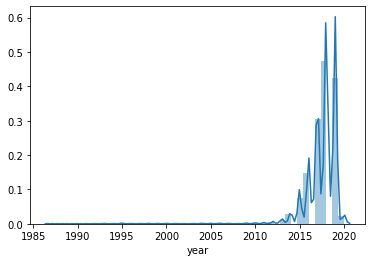

In [14]:
sns.distplot(dblp_df['year'])

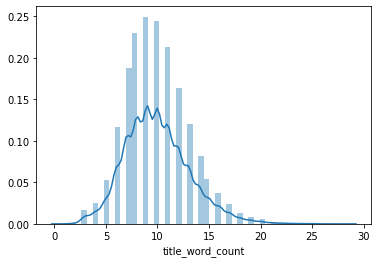

In [16]:
sns.distplot(dblp_df['title_word_count'])

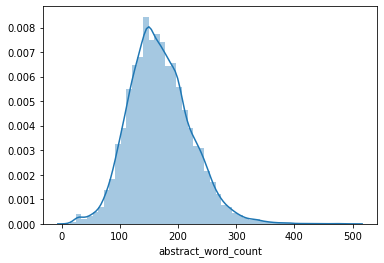

In [22]:
sns.distplot(dblp_df['abstract_word_count'])

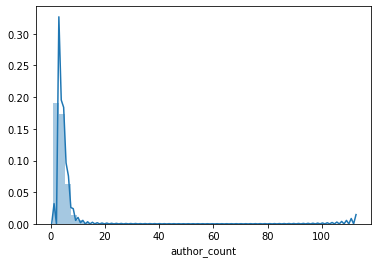

In [23]:
sns.distplot(dblp_df['author_count'])

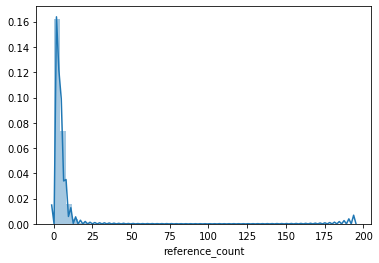

In [24]:
sns.distplot(dblp_df['reference_count'])

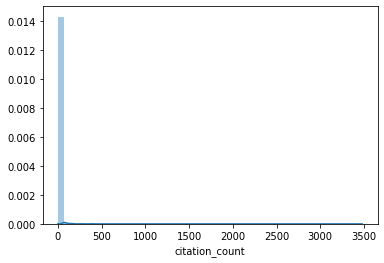

In [25]:
sns.distplot(dblp_df['citation_count'])

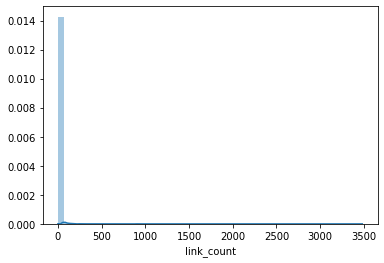

In [26]:
sns.distplot(dblp_df['link_count'])

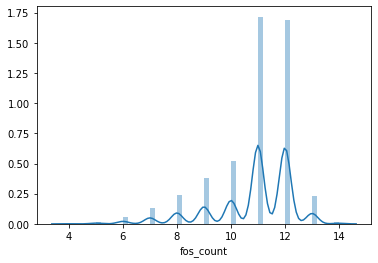

In [30]:
sns.distplot(dblp_df['fos_count'])